# 24444. 알고리즘 수업 - 너비 우선 탐색 1
다른 블로그 참조 : X(개념정리 할 때만 참조)

reference : https://gmlwjd9405.github.io/2018/08/15/algorithm-bfs.html

### Q)
오늘도 서준이는 너비 우선 탐색(BFS) 수업 조교를 하고 있다. 아빠가 수업한 내용을 학생들이 잘 이해했는지 문제를 통해서 확인해보자.

N개의 정점과 M개의 간선으로 구성된 무방향 그래프(undirected graph)가 주어진다. 정점 번호는 1번부터 N번이고 모든 간선의 가중치는 1이다. 정점 R에서 시작하여 너비 우선 탐색으로 노드를 방문할 경우 노드의 방문 순서를 출력하자.

너비 우선 탐색 의사 코드는 다음과 같다. 인접 정점은 오름차순으로 방문한다.

In [ ]:
bfs(V, E, R) { # V : 정점 집합, E : 간선 집합, R : 시작 정점
    for each v in V- {R}
        visited[v] <- NO;
    visited[R] <- YES; # 시작 정점 R을 방문했다고 표시한다.
    enqueue(Q, R); # 큐 맨 뒤에 시작 정점 R을 추가한다.
    while(Q is not empty) {
        u <- dequeue(Q); # 큐 맨 앞쪽의 요소를 삭제한다.
        for each v in E(u) # E(u) : 정점 u의 인접 정점 집합(오름차순)
            if(visited(v) = NO) then {
                visited(v) <- YES; # 정점 v를 방문 했다고 표시한다.
                enqueue(Q, v); # 큐 맨 뒤에 정점 v를 추가한다.
            }
    }
}

### Input)
첫째 줄에 정점의 수 N (5 ≤ N ≤ 100,000), 간선의 수 M (1 ≤ M ≤ 200,000), 시작 정점 R (1 ≤ R ≤ N)이 주어진다.

다음 M개 줄에 간선 정보 u v가 주어지며 정점 u와 정점 v의 가중치 1인 양방향 간선을 나타낸다. (1 ≤ u < v ≤ N, u ≠ v) 모든 간선의 (u, v) 쌍의 값은 서로 다르다.

### Output)
첫째 줄부터 N개의 줄에 정수를 한 개씩 출력한다. i번째 줄에는 정점 i의 방문 순서를 출력한다. 시작 정점의 방문 순서는 1이다. 시작 정점에서 방문할 수 없는 경우 0을 출력한다.

# Source Code)

In [ ]:
import sys
from sys import stdin
input = stdin.readline
sys.setrecursionlimit(10**9)

N, M, R = map(int, input().split())
graph = [[] for _ in range(N+1)]
visited = [False] * (N+1)
path = []
result = [0] * (N+1)

for _ in range(M):
    a, b = map(int, input().split())
    graph[a].append(b)
    graph[b].append(a)

for i in range(1, N+1):
    graph[i].sort()

def BFS(start):
    queue = []

    visited[start] = True
    queue.append(start)
    while queue:
        u = queue.pop(0)
        path.append(u)
        for v in graph[u]:
            if visited[v] == False:
                visited[v] = True
                queue.append(v)

BFS(R)

for idx, node in zip(range(1, N+1), path):
    result[node] = idx

print(*result[1:], sep='\n')

먼저 넓이 우선 탐색(BFS)에 대해 알아보자.

BFS는 루트 노드에서 시작해서 인접한 노드를 먼저 탐색하는 방법이다.
- 시작 정점으로부터 가까운 정점을 먼저 방문하고 멀리 떨어져 있는 정점을 나중에 방문하는 순회 방법이다.
- 즉, 넓게 탐색하는 방법이다.
- 두 노드 사이의 최단 경로 혹은 임의의 경로를 찾고 싶을 때 이 방법을 선택한다.
    EX) 지구상에 존재하는 모든 친구 관계를 그래프로 표현한 후 Ash와 Vanessa 사이에 존재하는 경로를 찾는 경우.
    깊이 우선 탐색의 경우 - 모든 친구 관계를 다 살펴봐야 할지도 모름.
    너비 우선 탐색의 경우 - Ash와 가까운 관계부터 탐색.

#### 특징
- BFS 는 재귀적으로 동작하지 않는다.
- 어떤 노드를 방문했었는지 여부를 반드시 검사해야한다.
- 큐를 사용한다. -> FIFO
- 'Prim', 'Dijkstra' 알고리즘과 유사하다.

#### 과정
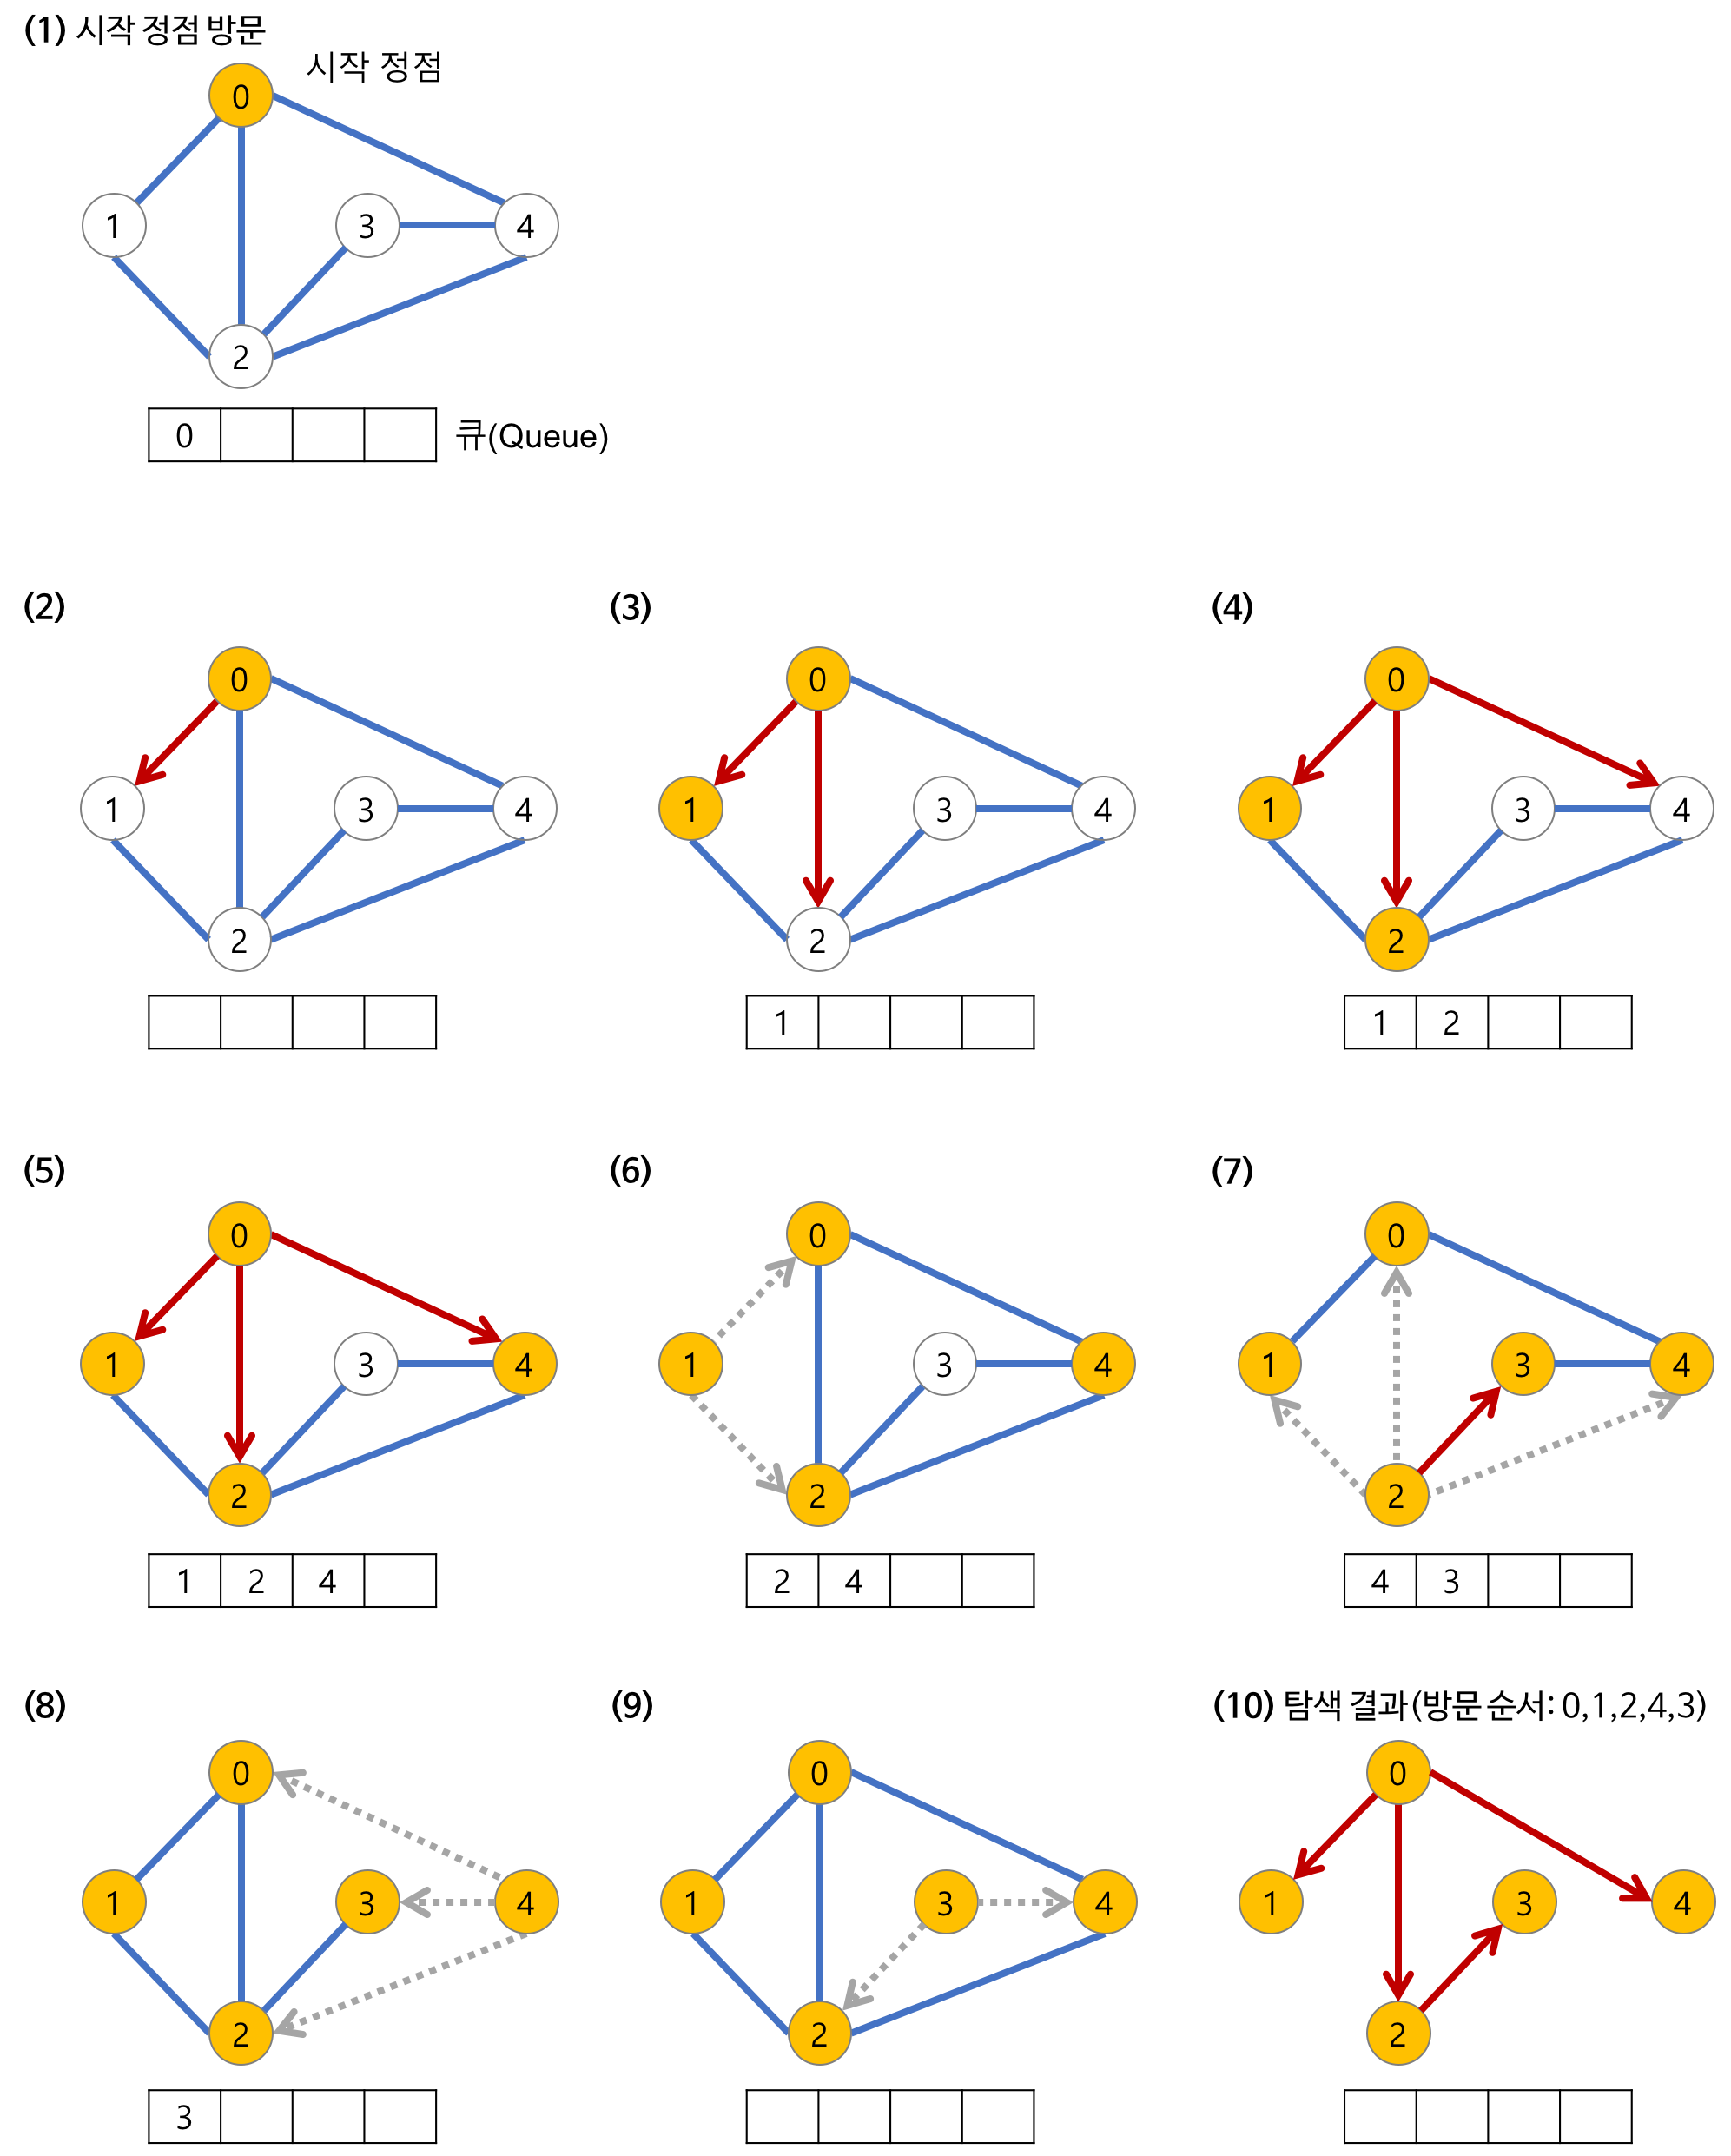